# GAN (Generative Adversarial Networks)

## 1. Giới thiệu về GAN
**GAN (Mạng Đối Kháng Tạo Sinh)** là một mô hình học sâu bao gồm hai mạng nơ-ron cạnh tranh: **Generator (G)** và **Discriminator (D)**. Generator tạo dữ liệu giả từ nhiễu ngẫu nhiên, còn Discriminator phân biệt dữ liệu thật và giả. Hai mạng được huấn luyện đồng thời trong một quá trình đối kháng, giúp Generator tạo ra dữ liệu ngày càng giống thật.

- **Ứng dụng**: Tạo dữ liệu (ảnh, điểm 2D), tăng cường dữ liệu, mô phỏng phân phối.
- **Ý tưởng chính**: Generator "lừa" Discriminator bằng cách tạo dữ liệu giả giống thật, còn Discriminator "vạch trần" dữ liệu giả.

## 2. Cấu trúc cơ bản của GAN

### 2.1. Thành phần
- **Generator (G)**:
  - **Đầu vào**: Vector nhiễu ngẫu nhiên $z \sim \mathcal{N}(0, 1)$ (phân phối chuẩn).
  - **Đầu ra**: Dữ liệu giả $G(z)$ (ví dụ: tọa độ 2D $[x, y]$).
- **Discriminator (D)**:
  - **Đầu vào**: Dữ liệu thật $x$ hoặc dữ liệu giả $G(z)$ (tọa độ 2D).
  - **Đầu ra**: Xác suất $D(x) \in [0, 1]$ (1 là thật, 0 là giả).

### 2.2. Mục tiêu
- **Generator**: Tối đa hóa $D(G(z))$ (làm Discriminator nhầm dữ liệu giả là thật).
- **Discriminator**: Tối đa hóa khả năng phân biệt $x$ và $G(z)$.

## 3. Công thức toán học và giải chi tiết

### 3.1. Hàm mục tiêu tổng quát
GAN được định nghĩa qua trò chơi minimax:
$$
\min_G \max_D V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)] + \mathbb{E}_{z \sim p_z(z)}[\log (1 - D(G(z)))]
$$

- **Giải thích**:
  1. $\mathbb{E}_{x \sim p_{\text{data}}(x)}[\log D(x)]$: Kỳ vọng Discriminator phân loại đúng dữ liệu thật (điểm trên đường tròn).
     - $D(x) \to 1$, $\log D(x) \to 0$ (tối đa hóa).
  2. $\mathbb{E}_{z \sim p_z(z)}[\log (1 - D(G(z)))]$: Kỳ vọng Discriminator phân loại đúng dữ liệu giả.
     - $D(G(z)) \to 0$, $1 - D(G(z)) \to 1$, $\log (1 - D(G(z))) \to 0$ (tối đa hóa).
- **Minimax**: $D$ tối đa hóa $V$, $G$ tối thiểu hóa $V$.

- **Ví dụ**:
  - $D(x) = 0.9$, $D(G(z)) = 0.2$:
  - $V(D, G) = \log 0.9 + \log (1 - 0.2) = -0.105 + (-0.223) = -0.328$.

- **Tại sao chọn**: Dạng cross-entropy, gradient mạnh khi $D(x)$ hoặc $1 - D(G(z))$ nhỏ.

### 3.2. Hàm mất mát của Discriminator
$$
L_D = - \frac{1}{m} \sum_{i=1}^m \left[ \log D(x^{(i)}) + \log (1 - D(G(z^{(i)}))) \right]
$$

- **Giải thích**:
  - $\log D(x^{(i)})$: Phân loại dữ liệu thật (điểm trên đường tròn).
  - $\log (1 - D(G(z^{(i)})))$: Phân loại dữ liệu giả (điểm do $G$ tạo).
  - Dấu trừ: Chuyển tối đa hóa $V$ thành tối thiểu hóa $-V$.

- **Ví dụ**:
  - Batch $m = 2$: $D(x^{(1)}) = 0.8$, $D(x^{(2)}) = 0.9$, $D(G(z^{(1)})) = 0.3$, $D(G(z^{(2)})) = 0.4$.
  - $L_D = - \frac{1}{2} [(\log 0.8 + \log 0.7) + (\log 0.9 + \log 0.6)] = - \frac{1}{2} [-1.196] = 0.598$.

- **Tại sao chọn**: Binary cross-entropy, dễ tính gradient.

### 3.3. Hàm mất mát của Generator
$$
L_G = - \frac{1}{m} \sum_{i=1}^m \log D(G(z^{(i)}))
$$

- **Giải thích**:
  - $D(G(z)) \to 1$, $\log D(G(z)) \to 0$, tối thiểu hóa $-\log D(G(z))$.
  - Tăng khả năng "lừa" Discriminator.

- **Ví dụ**:
  - Batch $m = 2$: $D(G(z^{(1)})) = 0.3$, $D(G(z^{(2)})) = 0.4$.
  - $L_G = - \frac{1}{2} [\log 0.3 + \log 0.4] = - \frac{1}{2} [-2.12] = 1.06$.

- **Tại sao chọn**: Tránh gradient biến mất so với $\log (1 - D(G(z)))$.

### 3.4. Cập nhật tham số
- **Discriminator**: $\theta_D \leftarrow \theta_D - \eta \cdot \nabla_{\theta_D} L_D$.
- **Generator**: $\theta_G \leftarrow \theta_G - \eta \cdot \nabla_{\theta_G} L_G$.
- **Ví dụ**: $L_D = 0.598$, $\nabla_{\theta_D} L_D = 0.1$, $\eta = 0.0002$:
  - $\theta_D \leftarrow \theta_D - 0.00002$.

## 4. Quy trình huấn luyện GAN
1. **Khởi tạo**: Tham số ngẫu nhiên cho $G$ và $D$, $\eta = 0.0002$, batch $m = 64$.
2. **Huấn luyện Discriminator**:
   - Lấy batch thật $x^{(i)}$ (điểm trên đường tròn) và nhiễu $z^{(i)}$.
   - Tạo $G(z^{(i)})$, tính $L_D$, cập nhật $\theta_D$.
3. **Huấn luyện Generator**:
   - Lấy nhiễu mới $z^{(i)}$, tính $L_G$, cập nhật $\theta_G$.
4. **Lặp lại**: Đến khi $D(x) \approx D(G(z)) \approx 0.5$.

## 5. Minh họa (Mô tả hình ảnh)
- **Hình 1: Kiến trúc GAN**:
  - $G$: $z$ → Fully Connected → $G(z)$ (tọa độ 2D).
  - $D$: $x$ hoặc $G(z)$ → Fully Connected → $D(x)$ (0-1).

  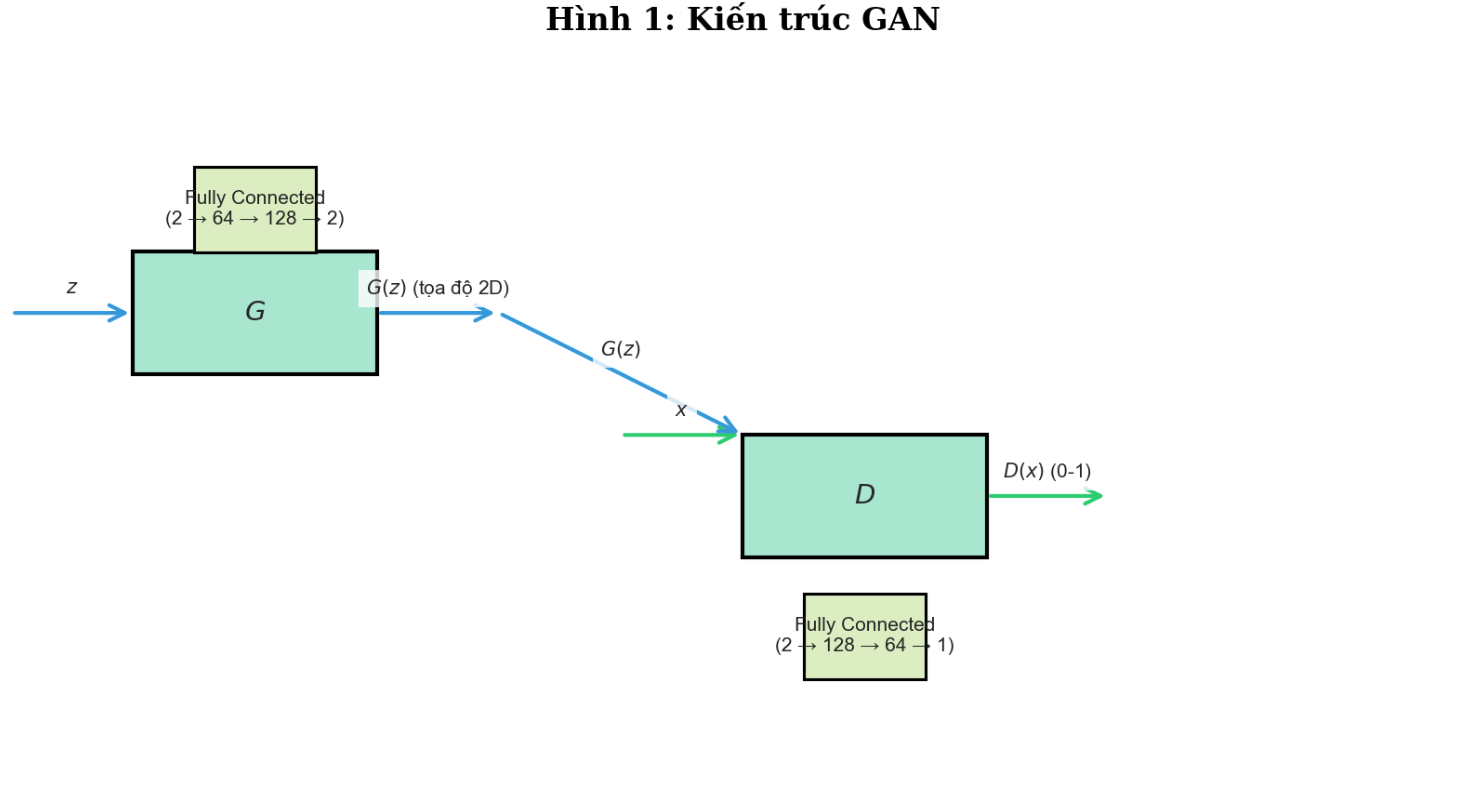
- **Hình 2: Quá trình đối kháng**:
  - Đường xanh ($L_D$) và đỏ ($L_G$) giao nhau tại điểm cân bằng.
  
  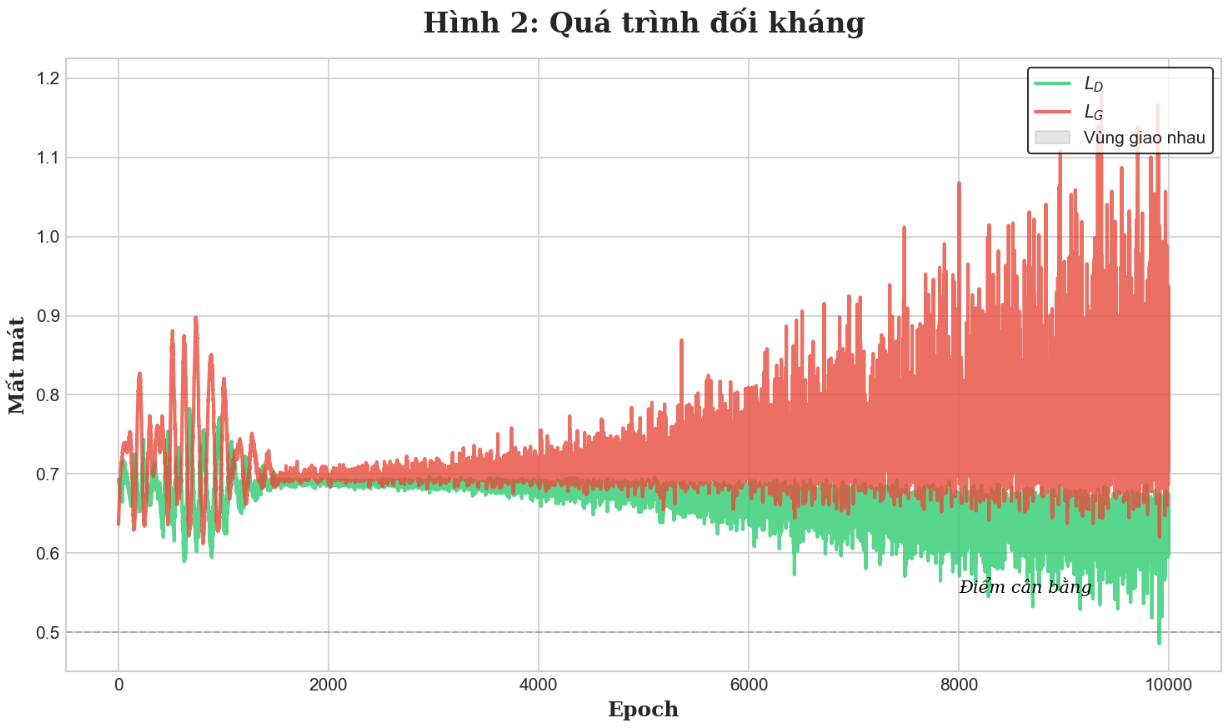

## 6. Ví dụ: Tạo điểm 2D trên đường tròn

Trong phần này, chúng ta sẽ áp dụng lý thuyết GAN để tạo các điểm 2D nằm trên đường tròn đơn vị (bán kính 1). Tôi sẽ giải thích từng bước tính toán và minh họa.

### 6.1. Thông tin cơ bản
- **Dữ liệu**: Các điểm thật có tọa độ $[x, y]$ trên đường tròn ($x = \cos(\theta)$, $y = \sin(\theta)$), tạo từ 1000 mẫu.
- **Generator**: 
  - Đầu vào: $z \in \mathbb{R}^{2}$ (vector nhiễu ngẫu nhiên từ $\mathcal{N}(0, 1)$).
  - Kiến trúc: $2 \to 64 \to 128 \to 2$, không có activation cuối (tạo tọa độ 2D).
- **Discriminator**: 
  - Đầu vào: Tọa độ 2D ($[x, y]$, thật hoặc giả).
  - Kiến trúc: $2 \to 128 \to 64 \to 1$, activation cuối là Sigmoid (đưa về $[0, 1]$).
- **Kết quả mong đợi**: Sau $10000$ epoch, các điểm giả từ Generator nằm gần đường tròn thật.

### 6.2. Quy trình tính toán từng bước

#### Bước 1: Khởi tạo và lấy dữ liệu
- **Nhiễu $z$**: Lấy batch $64$ vector $z^{(i)} \in \mathbb{R}^{2}$ từ $\mathcal{N}(0, 1)$.
  - Ví dụ: $z^{(1)} = [0.5, -0.3]$.
- **Dữ liệu thật $x$**: Lấy batch $64$ điểm từ đường tròn.
  - Ví dụ: $x^{(1)} = [0.6, 0.8]$ (gần đường tròn).

#### Bước 2: Generator tạo điểm giả
- **Công thức**: $G(z) = W_3 \cdot \text{LeakyReLU}(W_2 \cdot \text{LeakyReLU}(W_1 \cdot z + b_1) + b_2) + b_3$.
  - $W_1 \in \mathbb{R}^{64 \times 2}$, $W_2 \in \mathbb{R}^{128 \times 64}$, $W_3 \in \mathbb{R}^{2 \times 128}$.
- **Tính toán**:
  1. $h_1 = \text{LeakyReLU}(W_1 \cdot z + b_1)$: $z$ ($2$) → $h_1$ ($64$).
  2. $h_2 = \text{LeakyReLU}(W_2 \cdot h_1 + b_2)$: $h_1$ ($64$) → $h_2$ ($128$).
  3. $G(z) = W_3 \cdot h_2 + b_3$: $h_2$ ($128$) → $G(z)$ ($2$).
     - Ví dụ: $G(z^{(1)}) = [0.4, 0.7]$.

#### Bước 3: Discriminator phân loại
- **Công thức**: $D(x) = \text{Sigmoid}(W_6 \cdot \text{LeakyReLU}(W_5 \cdot \text{LeakyReLU}(W_4 \cdot x + b_4) + b_5) + b_6)$.
  - $W_4 \in \mathbb{R}^{128 \times 2}$, $W_5 \in \mathbb{R}^{64 \times 128}$, $W_6 \in \mathbb{R}^{1 \times 64}$.
- **Tính toán**:
  - Với $x^{(1)}$: $D(x^{(1)}) = 0.9$ (gần $1$, thật).
  - Với $G(z^{(1)})$: $D(G(z^{(1)})) = 0.2$ (gần $0$, giả).

#### Bước 4: Tính hàm mất mát
- **Discriminator**: 
  $$
  L_D = - \frac{1}{64} \sum_{i=1}^{64} \left[ \log D(x^{(i)}) + \log (1 - D(G(z^{(i)}))) \right]
  $$
  - Ví dụ: $L_D \approx 0.35$.
- **Generator**: 
  $$
  L_G = - \frac{1}{64} \sum_{i=1}^{64} \log D(G(z^{(i)}))
  $$
  - Ví dụ: $L_G \approx 1.39$.

#### Bước 5: Cập nhật tham số
- **Discriminator**: $\theta_D \leftarrow \theta_D - 0.0002 \cdot \nabla_{\theta_D} L_D$.
- **Generator**: $\theta_G \leftarrow \theta_G - 0.0002 \cdot \nabla_{\theta_G} L_G$.

#### Bước 6: Lặp lại
- Sau $10000$ epoch, $D(G(z)) \approx 0.5$, điểm giả gần đường tròn.

### 6.3. Hình ảnh mô tả
- **Hình 1: Dữ liệu thật và giả ban đầu**:
  - Thật: Điểm trên đường tròn.
  - Giả: Điểm phân bố ngẫu nhiên sau $1$ epoch.

  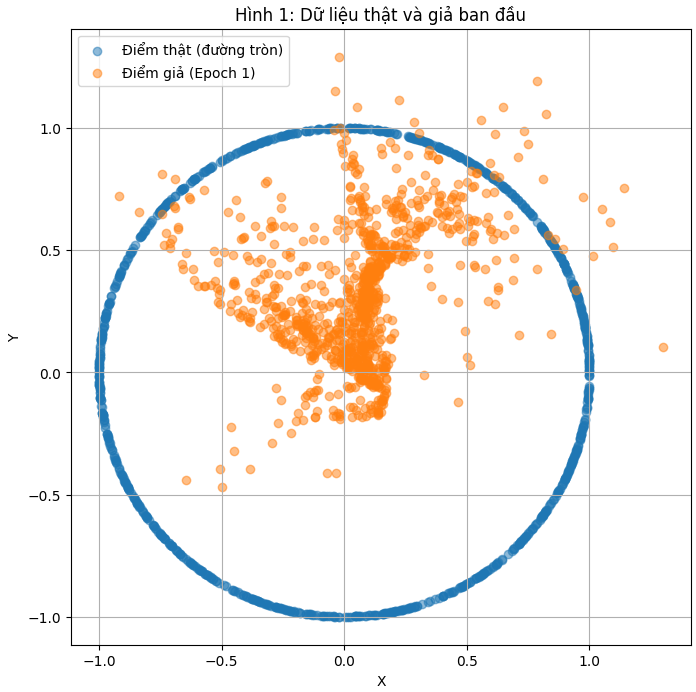
- **Hình 2: Tiến trình huấn luyện**:
  - $4$ ô: Điểm giả sau $1$, $1000$, $5000$, $10000$ epoch.

  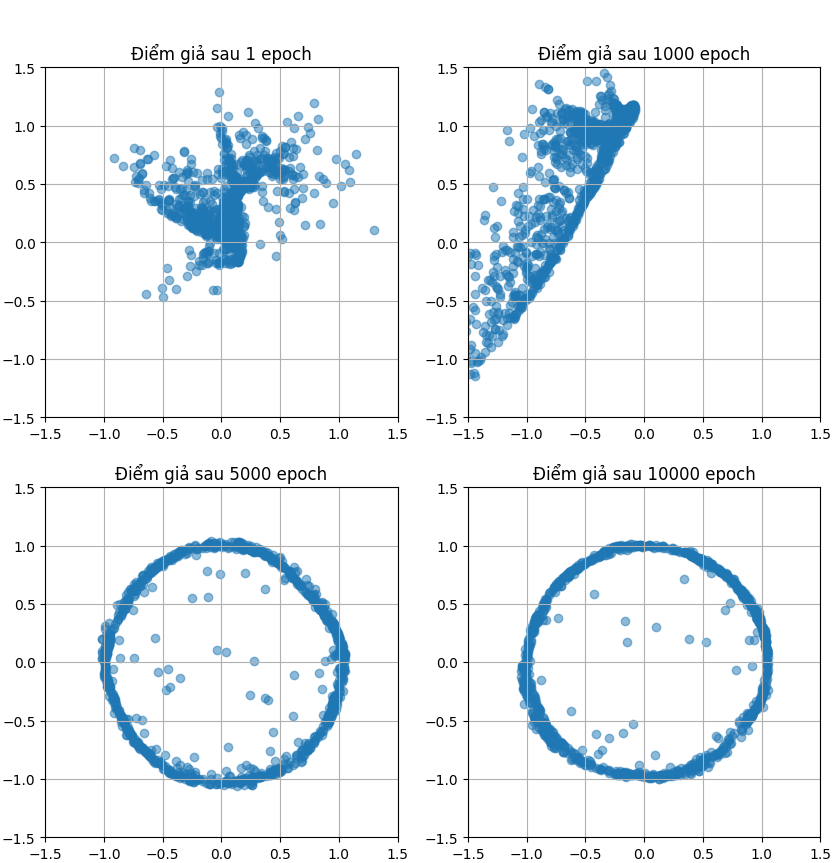
- **Hình 3: Đồ thị mất mát**:
  - Đường xanh ($L_D$), đỏ ($L_G$) giao nhau gần $0.5$.

  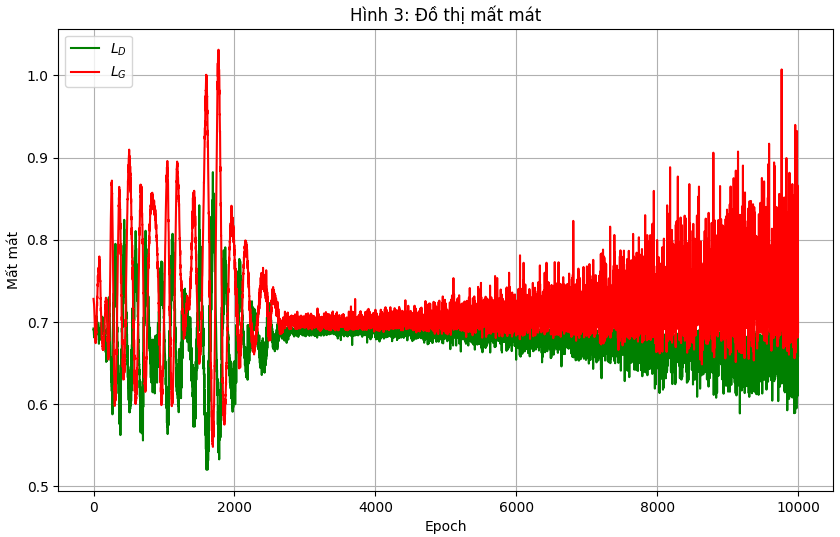

### 6.4. Kết quả
- Sau $10000$ epoch, điểm giả từ $G$ phân bố gần giống đường tròn thật.

## 7. Vấn đề và giải pháp
- **Mode Collapse**: $G$ tạo ít mẫu → Tăng noise_dim hoặc dùng WGAN.
- **Huấn luyện không ổn định**: Dao động lớn → Giảm $\eta$, điều chỉnh batch size.

## 8. Kết luận
GAN là công cụ mạnh mẽ để mô phỏng dữ liệu. Sinh viên cần hiểu công thức, quy trình huấn luyện và cách điều chỉnh để áp dụng thực tế.

# THỰC HÀNH

In [1]:
"""
Bài thực hành: Huấn luyện GAN cơ bản để tạo dữ liệu 2D
Mục tiêu: Sinh viên sẽ học cách xây dựng và huấn luyện GAN để tạo dữ liệu giả giống dữ liệu thật.
Dữ liệu: Các điểm nằm trên đường tròn 2D (x = cos(θ), y = sin(θ)).
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Tạo dữ liệu
def generate_real_data(samples=1000):
    theta = 2 * np.pi * np.random.rand(samples)  # Góc ngẫu nhiên từ 0 đến 2π
    x = np.cos(theta)
    y = np.sin(theta)
    data = np.stack([x, y], axis=1)
    return torch.tensor(data, dtype=torch.float32)

In [3]:

# Xây dựng Generator
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 64),       # Tầng 1: Từ nhiễu → 64 chiều
            nn.LeakyReLU(0.2),              # Activation để tránh gradient biến mất
            nn.Linear(64, 128),             # Tầng 2: 64 → 128 chiều
            nn.BatchNorm1d(128),            # Chuẩn hóa để ổn định huấn luyện
            nn.LeakyReLU(0.2),
            nn.Linear(128, output_dim),     # Tầng 3: 128 → 2 chiều (x, y)
        )
    
    def forward(self, x):
        return self.model(x)

In [4]:

# Xây dựng Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),      # Tầng 1: 2 → 128 chiều
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),             # Tầng 2: 128 → 64 chiều
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),               # Tầng 3: 64 → 1 chiều
            nn.Sigmoid(),                   # Đưa ra xác suất [0, 1]
        )
    
    def forward(self, x):
        return self.model(x)

In [5]:
# Hàm huấn luyện GAN
def train_gan(generator, discriminator, real_data, epochs=10000, batch_size=64, noise_dim=2, lr=0.0002):
    # Khởi tạo optimizers
    optimizer_g = optim.Adam(generator.parameters(), lr=lr)
    optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)
    
    # Hàm mất mát
    criterion = nn.BCELoss()
    
    # Lưu lịch sử để minh họa
    loss_d_history = []
    loss_g_history = []
    fake_data_progress = []
    milestones = [0, 1000, 5000, 9000]  # Các mốc để lưu dữ liệu giả
    
    for epoch in range(epochs):
        # Bước 1: Huấn luyện Discriminator
        real_data_batch = real_data[torch.randint(0, len(real_data), (batch_size,))]  # Lấy batch ngẫu nhiên
        real_labels = torch.ones((batch_size, 1))  # Nhãn thật = 1
        fake_noise = torch.randn((batch_size, noise_dim))  # Nhiễu ngẫu nhiên
        fake_data = generator(fake_noise)  # Tạo dữ liệu giả
        fake_labels = torch.zeros((batch_size, 1))  # Nhãn giả = 0

        real_preds = discriminator(real_data_batch)
        fake_preds = discriminator(fake_data.detach())  # Detach để không cập nhật Generator

        loss_d_real = criterion(real_preds, real_labels)
        loss_d_fake = criterion(fake_preds, fake_labels)
        loss_d = (loss_d_real + loss_d_fake) / 2

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Bước 2: Huấn luyện Generator
        fake_noise = torch.randn((batch_size, noise_dim))
        fake_data = generator(fake_noise)
        fake_preds = discriminator(fake_data)
        loss_g = criterion(fake_preds, real_labels)  # Generator muốn Discriminator nhầm là thật

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

        # Lưu thông tin
        loss_d_history.append(loss_d.item())
        loss_g_history.append(loss_g.item())
        if epoch in milestones:
            with torch.no_grad():
                fake_data_progress.append(generator(torch.randn(1000, noise_dim)).numpy())
        
        # In tiến trình
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch + 1}/{epochs} | Loss D: {loss_d:.4f}, Loss G: {loss_g:.4f}")
    
    return loss_d_history, loss_g_history, fake_data_progress

In [6]:
# 1. Tạo dữ liệu thật
real_data = generate_real_data(1000)

# 2. Khởi tạo mô hình
noise_dim = 2
generator = Generator(noise_dim=noise_dim, output_dim=2)
discriminator = Discriminator(input_dim=2)

# 3. Huấn luyện GAN
epochs = 10000
loss_d_history, loss_g_history, fake_data_progress = train_gan(generator, discriminator, real_data, epochs=epochs)


Epoch 1000/10000 | Loss D: 0.6635, Loss G: 0.7388
Epoch 2000/10000 | Loss D: 0.6886, Loss G: 0.6918
Epoch 3000/10000 | Loss D: 0.6895, Loss G: 0.6998
Epoch 4000/10000 | Loss D: 0.6850, Loss G: 0.7226
Epoch 5000/10000 | Loss D: 0.6711, Loss G: 0.7148
Epoch 6000/10000 | Loss D: 0.6473, Loss G: 0.7179
Epoch 7000/10000 | Loss D: 0.6552, Loss G: 0.8007
Epoch 8000/10000 | Loss D: 0.6824, Loss G: 0.8139
Epoch 9000/10000 | Loss D: 0.6541, Loss G: 0.6919
Epoch 10000/10000 | Loss D: 0.6393, Loss G: 0.8911


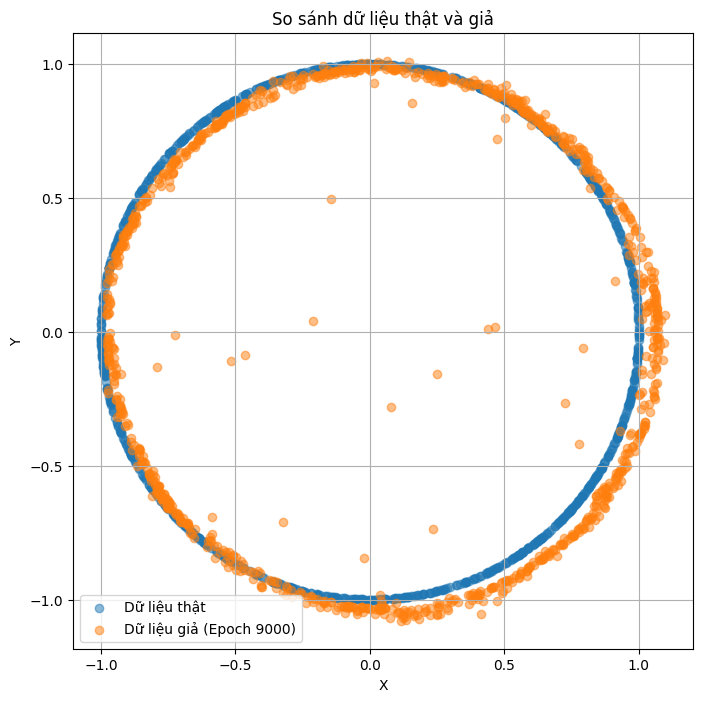

In [7]:
# 4. Vẽ kết quả
# Hình 1: So sánh dữ liệu thật và giả
plt.figure(figsize=(8, 8))
plt.scatter(real_data[:, 0], real_data[:, 1], label="Dữ liệu thật", alpha=0.5)
plt.scatter(fake_data_progress[-1][:, 0], fake_data_progress[-1][:, 1], label="Dữ liệu giả (Epoch 9000)", alpha=0.5)
plt.title("So sánh dữ liệu thật và giả")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

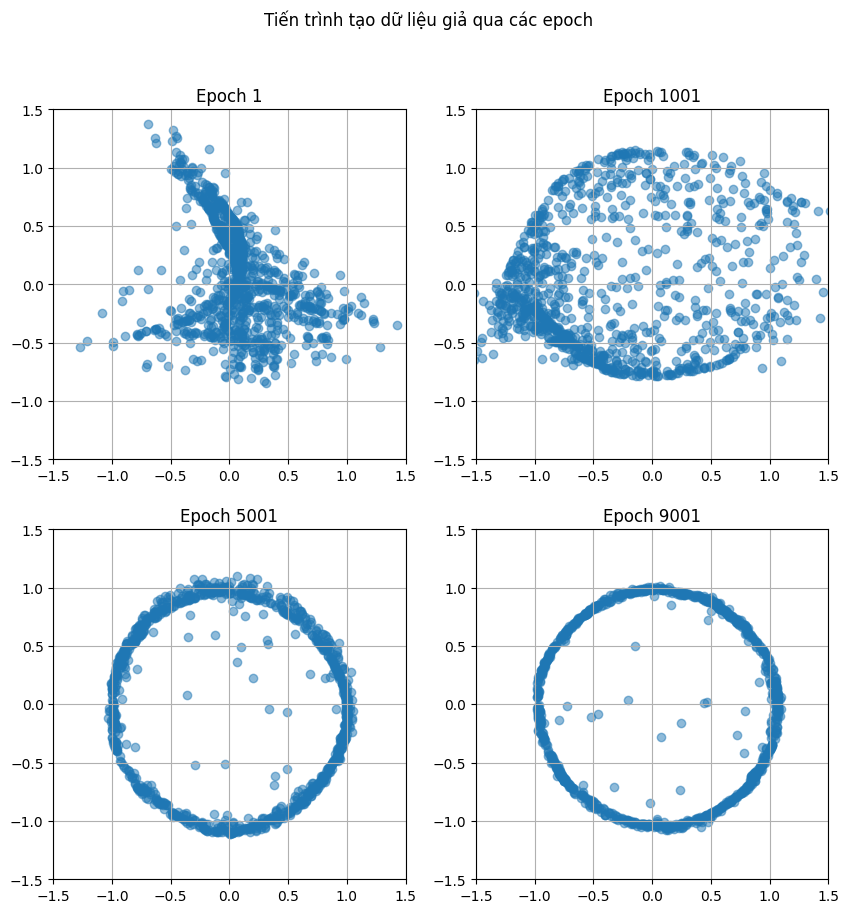

In [8]:

# Hình 2: Tiến trình tạo dữ liệu giả
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
milestones = [0, 1000, 5000, 9000]
for i, ax in enumerate(axes.flat):
    ax.scatter(fake_data_progress[i][:, 0], fake_data_progress[i][:, 1], alpha=0.5)
    ax.set_title(f"Epoch {milestones[i] + 1}")
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)
plt.suptitle("Tiến trình tạo dữ liệu giả qua các epoch")
plt.show()


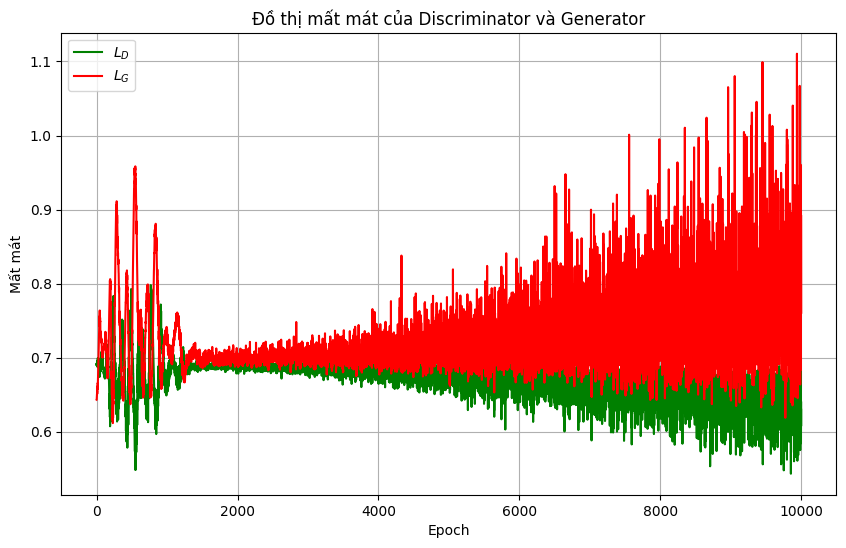

In [9]:

# Hình 3: Đồ thị mất mát
plt.figure(figsize=(10, 6))
plt.plot(loss_d_history, label="$L_D$", color="green")
plt.plot(loss_g_history, label="$L_G$", color="red")
plt.xlabel("Epoch")
plt.ylabel("Mất mát")
plt.title("Đồ thị mất mát của Discriminator và Generator")
plt.legend()
plt.grid(True)
plt.show()


Câu hỏi thực hành cho sinh viên:
1. Thay đổi noise_dim (ví dụ: 4, 8, 16) và quan sát kết quả dữ liệu giả. Điều gì xảy ra?
2. Thử tăng số epoch lên 20000 hoặc giảm xuống 5000. Mất mát thay đổi thế nào?
3. Thêm một tầng ẩn vào Generator hoặc Discriminator. Kết quả có cải thiện không?
4. Thay LeakyReLU bằng ReLU hoặc Tanh. Điều gì xảy ra với quá trình huấn luyện?

# BÀI TẬP VỀ NHÀ 

In [ ]:
# THỰC HÀNH TRÊN DỮ LIỆU MNIST

# DỰA VÀO LÝ THUYẾT ĐÃ HỌC Ở TRÊN, CÁC BẠN SINH VIÊN VỀ NHÀ HOÀN THÀNH MÔ HÌNH ĐANG CÒN NHỮNG CHỖ CHƯA HOÀN THÀNH.

# NHẬN XÉT KẾT QUẢ SAU KHI HOÀN THÀNH QUÁ TRÌNH HUẤN LUYỆN MÔ HÌNH

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

In [ ]:
# Định nghĩa Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
          #CODE HERE   # Từ nhiễu 100 chiều → 256
            #CODE HERE
             #CODE HERE # 256 → 512
            #CODE HERE
            #CODE HERE # 512 → 784 (28x28)
           #CODE HERE  # Đưa giá trị về [-1, 1]
        )
    
    def forward(self, z):
        return self.model(z)

# Định nghĩa Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
           #CODE HERE  # Từ ảnh 784 chiều → 512
            #CODE HERE
          #CODE HERE # 512 → 256
           #CODE HERE
            #CODE HERE    # 256 → 1
            #CODE HERE      # Đưa giá trị về [0, 1]
        )
    
    def forward(self, x):
        return self.model(x)

In [ ]:
# Khởi tạo mô hình
generator = #CODE HERE
discriminator = #CODE HERE

# Hàm huấn luyện GAN
def train_gan(generator, discriminator, data_loader, num_epochs=200, lr=0.0002):
    criterion = #CODE HERE # Binary Cross-Entropy Loss
    optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
    optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)
    
    z_dim = 100
    images_progress = []
    loss_D_history = []
    loss_G_history = []
    milestones = #CODE HERE  # Epoch 1, 50, 100, 200 (đếm từ 0)

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(data_loader):
            batch_size = #CODE HERE
            real_images = #CODE HERE  # Chuyển thành vector 784 chiều
            
            # Bước 2: Huấn luyện Discriminator
            optimizer_D.zero_grad()
            real_output = discriminator(real_images)
            z = #CODE HERE # Nhiễu ngẫu nhiên từ N(0, 1)
            fake_images = #CODE HERE
            fake_output = #CODE HERE
            
            # Tính L_D = -1/m * [log D(x) + log (1 - D(G(z)))]
            real_loss = #CODE HERE # +1e-8 để tránh log(0)
            fake_loss = #CODE HERE
            loss_D = #CODE HERE
            loss_D.backward()
            optimizer_D.step()
            
            # Bước 3: Huấn luyện Generator
            optimizer_G.zero_grad()
            fake_output = #CODE HERE
            # Tính L_G = -1/m * log D(G(z))
            loss_G = #CODE HERE
            loss_G.backward()
            optimizer_G.step()
            
            # Lưu dữ liệu để minh họa
            if i == 0:
                if epoch in milestones:
                    images_progress.append(fake_images[0].detach().cpu().view(28, 28).numpy())
                loss_D_history.append(loss_D.item())
                loss_G_history.append(loss_G.item())
        
        print(f'Epoch [{epoch+1}/{num_epochs}] - Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}')
    
    return images_progress, loss_D_history, loss_G_history

In [ ]:
# Huấn luyện mô hình (200 epoch)
num_epochs = 200
images_progress, loss_D_history, loss_G_history = #CODE HERE

# Lấy một ảnh thật từ MNIST
real_image = next(iter(data_loader))[0][0].view(28, 28).numpy()

In [ ]:
# Hình 1: Dữ liệu thật và giả ban đầu
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(real_image, cmap='gray')
plt.title('Ảnh thật từ MNIST')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(images_progress[0], cmap='gray')
plt.title('Ảnh giả sau 1 epoch')
plt.axis('off')
plt.show()

In [ ]:
# Hình 2: Tiến trình huấn luyện
plt.figure(figsize=(10, 10))
milestones = [1, 50, 100, 200]
for i, epoch in enumerate(milestones):
    plt.subplot(2, 2, i+1)
    plt.imshow(images_progress[i], cmap='gray')
    plt.title(f'Ảnh giả sau {epoch} epoch')
    plt.axis('off')
plt.show()

In [ ]:
# Hình 3: Đồ thị mất mát
plt.figure(figsize=(10, 6))
plt.plot(loss_D_history, label='$L_D$', color='green')
plt.plot(loss_G_history, label='$L_G$', color='red')
plt.xlabel('Epoch')
plt.ylabel('Mất mát')
plt.title('Đồ thị mất mát')
plt.legend()
plt.grid(True)
plt.show()